In [1]:
import h5py
import pandas as pd
import cv2
import numpy as np
import matplotlib.patches as patches
from matplotlib import pyplot as plt
from collections import namedtuple
from utils import compute_distance
from utils import remove_tracking_errors
from behaviour.tracking.tracking import prepare_tracking_data
from roi_analysis import get_timeinrois_stats

#path = r'C:\Users\maksymilianm\Dropbox (UCL - SWC)\Project_spiders\Analysis\confined_shade_arena_exploration\03_02_20_sp5DLC_resnet50_large_spidersJan27shuffle1_1030000.h5'
path = r'C:\Users\maksymilianm\Dropbox (UCL - SWC)\Project_spiders\Analysis\confined_shade_arena_exploration\04_02_20_sp7DLC_resnet50_large_spidersJan27shuffle1_1030000.h5'
data = pd.read_hdf(path)
#for key in data:
 #   print(key)
centre_x, centre_y, centre_likelihood = (data['DLC_resnet50_large_spidersJan27shuffle1_1030000']['centre']['x'], 
                                        data['DLC_resnet50_large_spidersJan27shuffle1_1030000']['centre']['y'],
                                        data['DLC_resnet50_large_spidersJan27shuffle1_1030000']['centre']['likelihood'])
                                        

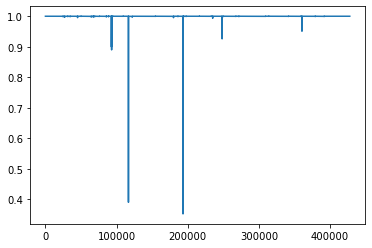

In [2]:
plt.plot(centre_likelihood)

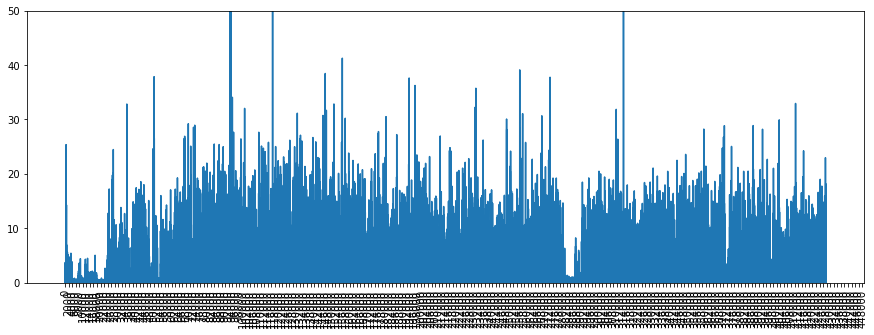

In [3]:
distance_per_frame = compute_distance(centre_x, centre_y)
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylim(0, 50)
#Adjust the x-axis label range and interval to better see which parts need to be excluded
plt.xticks(np.arange(0,520000, step=2000), rotation = 'vertical')
plt.plot(distance_per_frame)

In [4]:
#Introduce new limits to the data based on observation in previous step
trim_data = data [5000:]
trimmed_path = r'C:\Users\maksymilianm\Dropbox (UCL - SWC)\Project_spiders\Analysis\confined_shade_arena_exploration\04_02_20_sp7_trimmed_tracking.h5' 
#trim_data.to_hdf(trimmed_path, key="hdf")


In [5]:
processed_path = r'C:\Users\maksymilianm\Dropbox (UCL - SWC)\Project_spiders\Analysis\confined_shade_arena_exploration\04_02_20_sp7_processed_centre_tracking.h5' 
transform_array = np.load(r'C:\Users\maksymilianm\Dropbox (UCL - SWC)\Project_spiders\Analysis\confined_shade_arena_exploration\04_02_20_sp7_transform.npy')
processed_data = prepare_tracking_data(trimmed_path, likelihood_th=0.9, median_filter=False,interpolate_nans=True, common_coord=True, ccm_mtx=transform_array, compute=True)
processed_data['centre'].to_hdf(processed_path, key="dsfsdf")
print(processed_data['centre'])

Processing: C:\Users\maksymilianm\Dropbox (UCL - SWC)\Project_spiders\Analysis\confined_shade_arena_exploration\04_02_20_sp7_trimmed_tracking.h5
     registering to reference space


UnboundLocalError: local variable 'like' referenced before assignment

In [ ]:
#Check if the errors are successfully removed 
centre_likelihood = (processed_data['centre']['likelihood'])
plt.plot(centre_likelihood)

In [ ]:
centre_x, centre_y = (processed_data['centre']['x'], processed_data['centre']['y'])
dpf = compute_distance(centre_x, centre_y)
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dpf)

In [ ]:
# Get XY tracking
x = processed_data['centre'].x.values
y = processed_data['centre'].y.values
xy = np.vstack([x, y]).T # creates an Nx2 array with N=number of frames and XY at each frame

# Define ROI position
position = namedtuple('position', ['topleft', 'bottomright'])
rois = {'shelter': position((345,860), (895,1060)),}

# Get ROI stats
res = get_timeinrois_stats(xy , rois, fps=40,  returndf=False, check_inroi=False)
print(res)

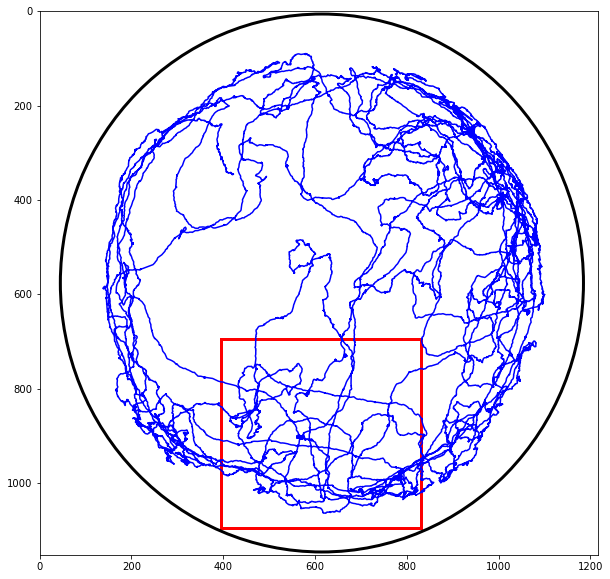

In [110]:
centre_x, centre_y = (processed_data['centre']['x'], processed_data['centre']['y'])
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(centre_x, centre_y, c='b')
ax.set_ylim(1152, 0)
ax.set_xlim(0, 1216)
#confined_shade_arena_exploration ROI
#ROI = patches.Rectangle((345,860),550,200,linewidth=3,edgecolor='r',facecolor='none')
#shade_arena_exploration ROI
ROI = patches.Rectangle((395,695),435,400,linewidth=3,edgecolor='r',facecolor='none')
arena = patches.Circle((615,576),570,linewidth=3,edgecolor='k',facecolor='none')
ax.add_patch(ROI)
ax.add_patch(arena)

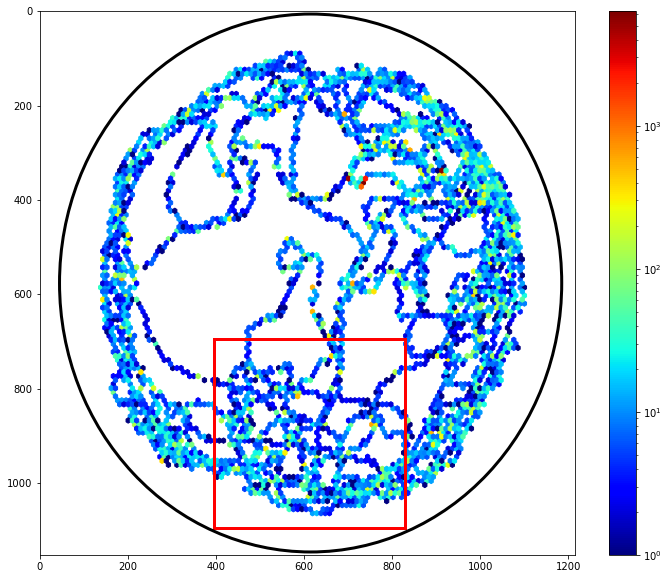

In [111]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_ylim(1152, 0)
ax.set_xlim(0, 1216)
plt.hexbin(centre_x,centre_y, bins = 'log', mincnt=1, cmap=plt.cm.jet)
plt.colorbar()
#confined_shade_arena_exploration ROI
#ROI = patches.Rectangle((345,860),550,200,linewidth=3,edgecolor='r',facecolor='none')
#shade_arena_exploration ROI
ROI = patches.Rectangle((395,695),435,400,linewidth=3,edgecolor='r',facecolor='none')
arena = patches.Circle((615,576),570,linewidth=3,edgecolor='k',facecolor='none')
ax.add_patch(ROI)
ax.add_patch(arena)

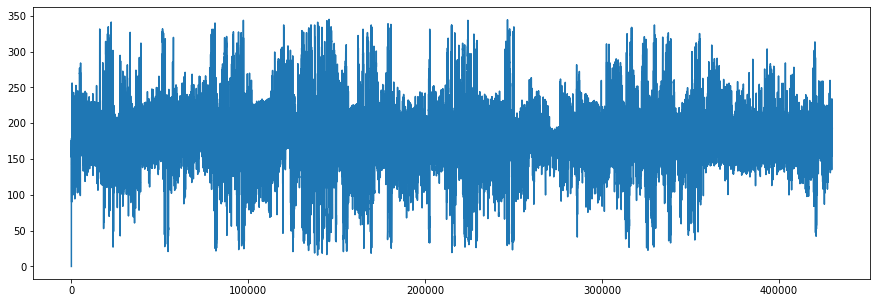

In [288]:
centre_ang_vel = (processed_data['centre']['direction_of_movement'])
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(centre_ang_vel)